In [265]:
import numpy as np
import pandas as pd

# Generate a larger dataset (100 rows) with a small amount of noise
np.random.seed(42)
# Simulating realistic data for study hours, sleep hours, and class attendance
study_hours = np.random.randint(1, 11, 100)  # Random study hours between 1 and 10
sleep_hours = np.random.randint(5, 9, 100)   # Random sleep hours between 5 and 8
class_attendance = np.random.randint(70, 101, 100)  # Random attendance between 70 and 100%
# Creating the exam score based on a deterministic formula and adding small noise
exam_scores = (study_hours * 6 + sleep_hours*2 + class_attendance * 0.2) + np.random.normal(0, 3, 100)  # Small noise with standard deviation 3

In [266]:
# Create a DataFrame with the generated data
df = pd.DataFrame({'Study Hours': study_hours,
                   'Sleep Hours': sleep_hours, 'Class Attendance': class_attendance, 'Exam Score': exam_scores
})
# Display the first few rows of the DataFrame
print("First few rows of the dataset:\n", df.head(), "\n")

First few rows of the dataset:
    Study Hours  Sleep Hours  Class Attendance  Exam Score
0            7            8                70   75.131582
1            4            6                88   55.179344
2            8            5                79   77.891660
3            5            8                81   69.817488
4            7            7                93   73.626527 



In [267]:
df.to_csv('exam_scores_dataset.csv', index=False)

# Display the first few rows
print("Dataset Generated:")
print(df.head())

Dataset Generated:
   Study Hours  Sleep Hours  Class Attendance  Exam Score
0            7            8                70   75.131582
1            4            6                88   55.179344
2            8            5                79   77.891660
3            5            8                81   69.817488
4            7            7                93   73.626527


In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

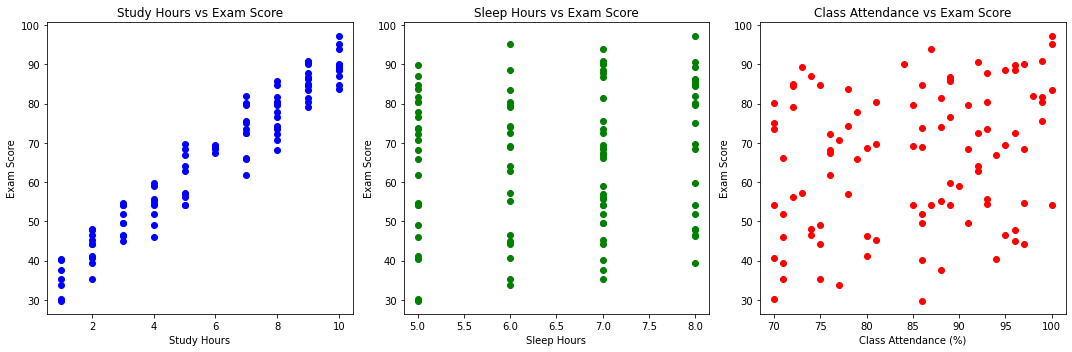

In [269]:
# Create a scatter plot for each feature against Exam Score
plt.figure(figsize=(15, 5))

# Study Hours vs Exam Score
plt.subplot(1, 3, 1)
plt.scatter(df['Study Hours'], df['Exam Score'], color='blue')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')

# Sleep Hours vs Exam Score
plt.subplot(1, 3, 2)
plt.scatter(df['Sleep Hours'], df['Exam Score'], color='green')
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')

# Class Attendance vs Exam Score
plt.subplot(1, 3, 3)
plt.scatter(df['Class Attendance'], df['Exam Score'], color='red')
plt.title('Class Attendance vs Exam Score')
plt.xlabel('Class Attendance (%)')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()

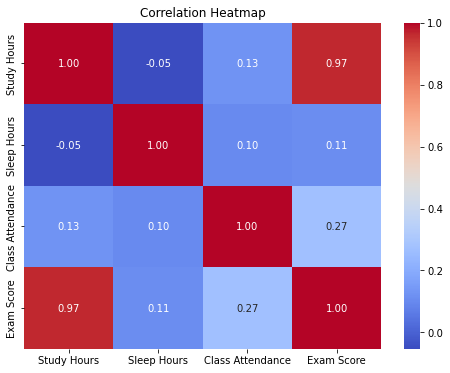

In [270]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

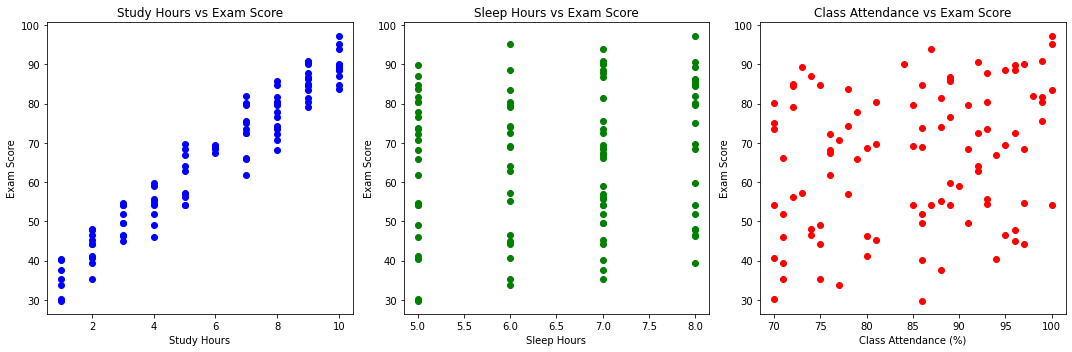

In [300]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Study Hours vs Exam Score
plt.subplot(1, 3, 1)
plt.scatter(df['Study Hours'], df['Exam Score'], color='blue')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')

# Sleep Hours vs Exam Score
plt.subplot(1, 3, 2)
plt.scatter(df['Sleep Hours'], df['Exam Score'], color='green')
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')

# Class Attendance vs Exam Score
plt.subplot(1, 3, 3)
plt.scatter(df['Class Attendance'], df['Exam Score'], color='red')
plt.title('Class Attendance vs Exam Score')
plt.xlabel('Class Attendance (%)')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()

In [271]:
# Export to Excel
df.to_excel('exam_scores_data.xlsx', index=False)  # Save without the index column
print("Data exported to 'exam_scores_data.xlsx'")

Data exported to 'exam_scores_data.xlsx'


In [272]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [284]:
 Feature scaling (standardize the features)
scaler = StandardScaler()
X = df[['Study Hours', 'Sleep Hours', 'Class Attendance']]  # Features: Study Hours, Sleep Hours, Class Attendance
y = df['Exam Score']  # Target: Exam Score
X_scaled = scaler.fit_transform(X)  # Apply scaling#

In [285]:

# Convert back to DataFrame for easy comparison
X_scaled = pd.DataFrame(X_scaled , columns=['Study Hours', 'Sleep Hours', 'Class Attendance'])


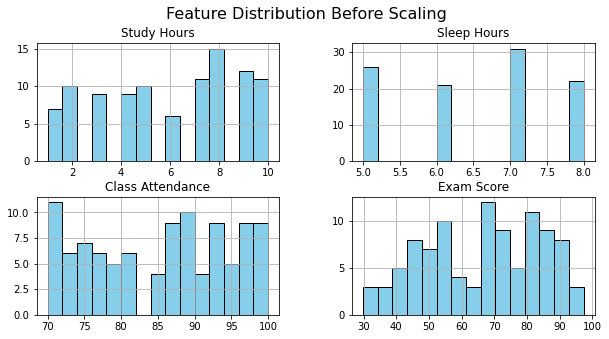

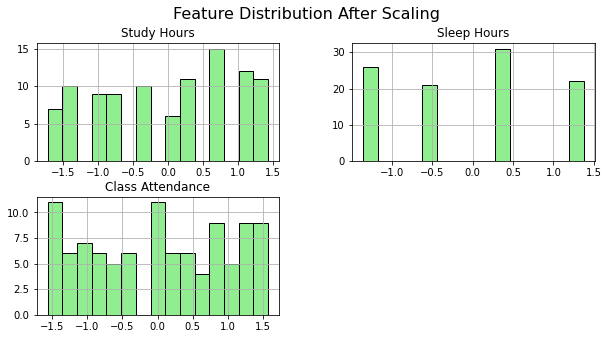

In [286]:
# Before scaling
df.hist(figsize=(10, 5), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distribution Before Scaling', fontsize=16)
plt.show()

# After scaling
X_scaled.hist(figsize=(10, 5), bins=15, color='lightgreen', edgecolor='black')
plt.suptitle('Feature Distribution After Scaling', fontsize=16)
plt.show()

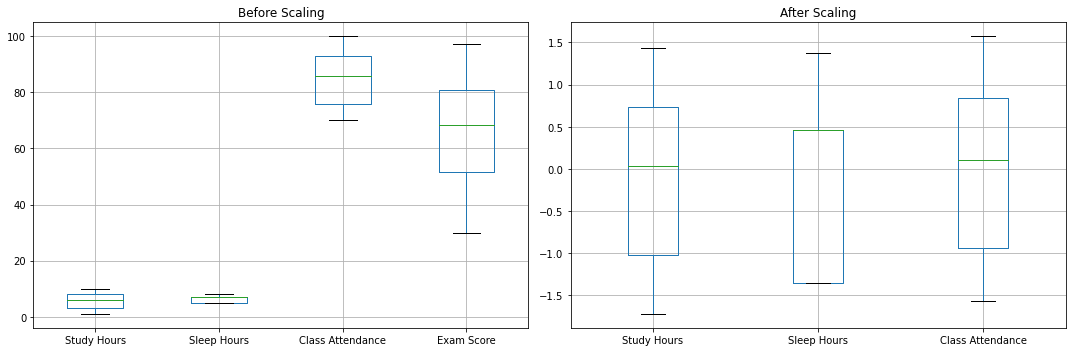

In [287]:
plt.figure(figsize=(15, 5))

# Before scaling
plt.subplot(1, 2, 1)
df.boxplot()
plt.title('Before Scaling')

# After scaling
plt.subplot(1, 2, 2)
X_scaled.boxplot()
plt.title('After Scaling')

plt.tight_layout()
plt.show()


In [288]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the sizes of each split
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (80, 3)
Testing features shape: (20, 3)
Training target shape: (80,)
Testing target shape: (20,)


In [289]:
print("Training Data:")
print(X_train.head())
print(y_train.head())

print("\nTesting Data:")
print(X_test.head())
print(y_test.head())

Training Data:
    Study Hours  Sleep Hours  Class Attendance
55    -0.668556     1.372784         -1.459893
88     0.731561    -1.354601         -1.564470
26     1.431620    -0.445473          1.154529
42     1.431620    -1.354601         -1.041586
69     1.081590     1.372784         -1.355316
55    51.773189
88    73.648729
26    88.597077
42    84.627603
69    84.421919
Name: Exam Score, dtype: float64

Testing Data:
    Study Hours  Sleep Hours  Class Attendance
83    -1.718644    -1.354601         -1.564470
53    -1.368614     1.372784         -1.146163
70     0.731561     1.372784          0.422491
45    -0.318527    -0.445473          0.736221
44     1.431620     1.372784         -1.250740
83    30.240596
53    48.088812
70    85.792644
45    62.731149
44    89.242613
Name: Exam Score, dtype: float64


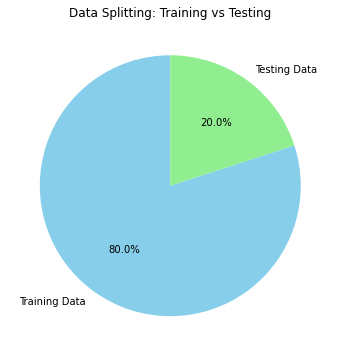

In [296]:
import matplotlib.pyplot as plt

# Define proportions
sizes = [80, 20]  # 80% training, 20% testing
labels = ['Training Data', 'Testing Data']
colors = ['skyblue', 'lightgreen']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Data Splitting: Training vs Testing')
plt.show()

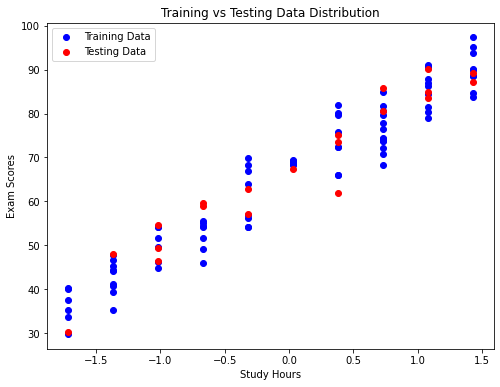

In [297]:
# Example scatter plot with mock data
plt.figure(figsize=(8, 6))

# Training data in blue
plt.scatter(X_train['Study Hours'], y_train, color='blue', label='Training Data')
# Testing data in red
plt.scatter(X_test['Study Hours'], y_test, color='red', label='Testing Data')

plt.title('Training vs Testing Data Distribution')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.legend()
plt.show()

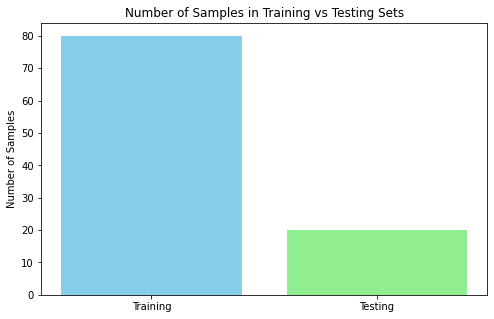

In [298]:
# Define dataset sizes
data_split = {'Training': len(X_train), 'Testing': len(X_test)}
names = list(data_split.keys())
values = list(data_split.values())

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(names, values, color=['skyblue', 'lightgreen'])
plt.title('Number of Samples in Training vs Testing Sets')
plt.ylabel('Number of Samples')
plt.show()

In [290]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [291]:
# Predict on the test set
y_pred = model.predict(X_test)

In [292]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Squared Error (MSE): 7.592598185547485
Root Mean Squared Error (RMSE): 2.755466963247334
R² Score: 0.9724843479883084


In [293]:
# Example of Predicted vs Actual Score for a specific index (let's take index 10)
example_index = 10  # You can change this to any index
print(f"\nExample for index {example_index}:")
print(f"Actual Exam Score: {y.iloc[example_index]}")
print(f"Predicted Exam Score: {y_pred[example_index]}")


Example for index 10:
Actual Exam Score: 59.65292253653343
Predicted Exam Score: 65.28271652451411


In [301]:
import joblib

# Save the trained model
joblib.dump(model, 'exam_score_predictor.pkl')
print("Model saved as 'exam_score_predictor.pkl'")


Model saved as 'exam_score_predictor.pkl'
